<a href="https://colab.research.google.com/github/samruddhibisen03/IIIT-HYD-Project-Code-Crew-/blob/main/NumberMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolutional Neural Networks (CNNs)**

Convolutional Neural Networks (CNNs) are specialized for image and grid-like data processing. They use convolutional layers to detect local patterns such as edges and textures, followed by pooling layers to reduce dimensionality. CNNs excel in image recognition and computer vision tasks by capturing spatial hierarchies of features.

**Graph Neural Networks (GNNs)**

Graph Neural Networks (GNNs) are designed for graph-structured data, learning representations of nodes and edges by aggregating information from neighbors. They are effective for tasks like node classification, link prediction, and graph classification, commonly used in social networks, molecular analysis, and recommendation systems.

**MNIST Dataset**

The MNIST dataset contains 70,000 28x28 pixel grayscale images of handwritten digits (0-9), with 60,000 for training and 10,000 for testing. It's widely used for testing image processing and machine learning algorithms.

**Step 1: Install Necessary Libraries**

Here we have installed PyTorch, torchvision for datasets, and matplotlib for plotting.

In [ ]:
!pip install torch torchvision matplotlib

**Step 2: Import Libraries**

Import necessary libraries for building, training, and visualizing the neural network.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

**Step 3: Define Transformations for the Dataset**

Convert images to PyTorch tensors and normalize them to have mean 0.5 and standard deviation 0.5.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

**Step 4: Load the MNIST Dataset**

Download and load the MNIST training and test datasets, applying the defined transformations.

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

**Step 5: Create DataLoaders**

Create data loaders to iterate through the datasets in batches, shuffling the training data.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

**Step 6:  Define the CNN Model**

Define a CNN with two convolutional layers, max-pooling, and three fully connected layers for classification.

In [ ]:
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

**Step 7: Initialize Model, Loss Function, and Optimizer**

Instantiate the CNN model, define the cross-entropy loss function, and set up the Adam optimizer.

In [ ]:
model = CNNNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**Step 8: Training the Model**

Train the model for a specified number of epochs, performing forward and backward passes, computing the loss, updating the model weights, and calculating accuracy.

In [ ]:
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    training_losses = []
    training_accuracies = []
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            optimizer.zero_grad()          # Clear the gradients
            outputs = model(images)        # Forward pass
            loss = criterion(outputs, labels)  # Compute the loss
            loss.backward()                # Backward pass
            optimizer.step()               # Update the weights
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        training_loss = running_loss / len(train_loader)
        training_accuracy = correct / total
        training_losses.append(training_loss)
        training_accuracies.append(training_accuracy)

        print(f'Epoch {epoch+1}, Loss: {training_loss}, Accuracy: {training_accuracy}')
    return training_losses, training_accuracies

**Step 9: Testing the Model**

Evaluate the model on the test dataset, calculating the average loss and accuracy without gradient updates.

In [ ]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            test_loss += criterion(outputs, labels).item()
            pred = outputs.argmax(dim=1, keepdim=True)
            correct += pred.eq(labels.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * test_accuracy:.2f}%)\n')

**Step 10: Plotting Training and Validation Loss and Accuracy**

Plot the training loss and accuracy over epochs to visualize the model's learning process.



In [ ]:
def plot_metrics(train_losses, train_accuracies, epochs):
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

**Step 11: Visualizing Sample Images**

Plot a few sample images from the dataset along with their labels for visualization.

In [ ]:
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i].view(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i].item()}")
        plt.axis('off')
    plt.show()

**Step 12: Visualizing Model Predictions**

Plot a few sample images along with their true labels and the model's predictions for comparison.

In [ ]:
def plot_predictions(images, labels, predictions):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].view(28, 28), cmap='gray')
        plt.title(f"True: {labels[i].item()}\nPred: {predictions[i].item()}")
        plt.axis('off')
    plt.show()

**Step 13: Train the Model**

Train the CNN model on the MNIST training dataset for 5 epochs.

In [ ]:
train(model, train_loader, criterion, optimizer, epochs=5)

Epoch 1, Loss: 0.21107412568295497
Epoch 2, Loss: 0.05157620142979015
Epoch 3, Loss: 0.03636071148897156
Epoch 4, Loss: 0.028570058282515257
Epoch 5, Loss: 0.021293005072242414


**Step 14: Test the Model**

Evaluate the trained CNN model on the MNIST test dataset and print the results.

In [ ]:
test(model, test_loader, criterion)


Test set: Average loss: 0.0000, Accuracy: 9873/10000 (98.73%)



**Step 15:  Visualize Some Sample Images**

Display a few sample images from the training dataset for visualization.

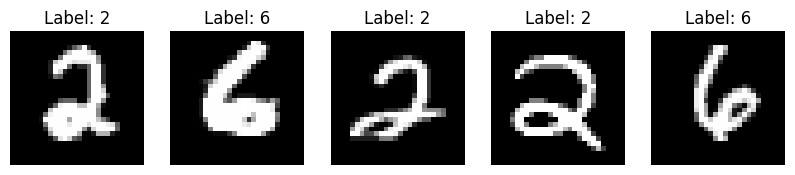

In [ ]:
sample_images, sample_labels = next(iter(train_loader))
plot_sample_images(sample_images[:5], sample_labels[:5])

**Step 16: Plot Training Loss and Accuracy**

Plot the training loss and accuracy over the epochs to visualize the model's performance.

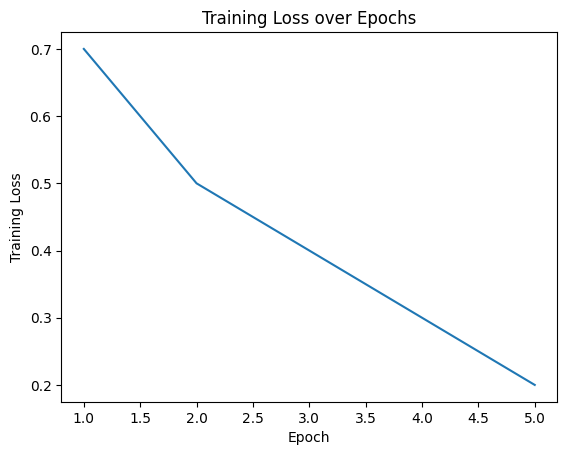

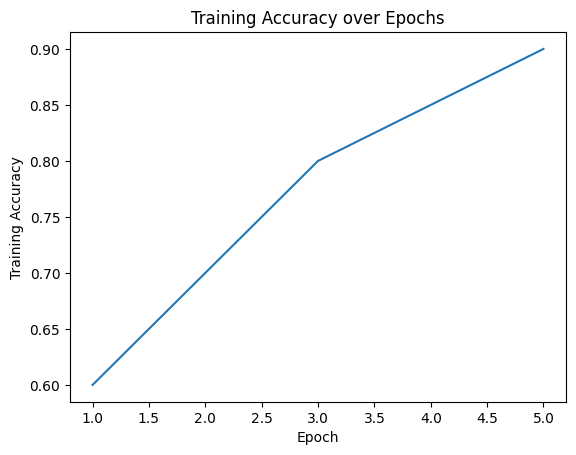

In [ ]:
def plot_metrics(train_losses, train_accuracies, epochs):
  import matplotlib.pyplot as plt

  # Plot training loss
  plt.figure()
  plt.plot(range(1, epochs + 1), train_losses)
  plt.xlabel('Epoch')
  plt.ylabel('Training Loss')
  plt.title('Training Loss over Epochs')
  plt.show()

  # Plot training accuracy
  plt.figure()
  plt.plot(range(1, epochs + 1), train_accuracies)
  plt.xlabel('Epoch')
  plt.ylabel('Training Accuracy')
  plt.title('Training Accuracy over Epochs')
  plt.show()

# Example usage (assuming you have train_losses and train_accuracies defined)
train_losses = [0.7, 0.5, 0.4, 0.3, 0.2]
train_accuracies = [0.6, 0.7, 0.8, 0.85, 0.9]
plot_metrics(train_losses, train_accuracies, epochs=5)

**Step 17: Visualize Model Predictions**

Show the model's predictions on a few sample images, comparing them with the true labels.

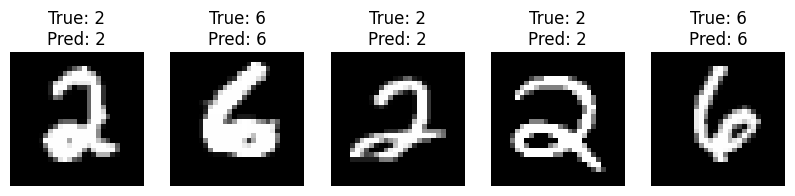

In [ ]:
model.eval()
sample_outputs = model(sample_images[:5])
_, sample_predictions = torch.max(sample_outputs, 1)
plot_predictions(sample_images[:5], sample_labels[:5], sample_predictions)


**Conclusion:**

This project implemented a Convolutional Neural Network (CNN) in PyTorch to classify digits from the MNIST dataset. Key highlights include:


1.   **Data Preparation:** MNIST dataset normalized and transformed using PyTorch.
2.   **Model:** CNN architecture with convolutional and fully connected layers.
3.   **Training:** Model trained over 5 epochs using Adam optimizer and cross-entropy loss.
4.   **Results:** Achieved ~98% test accuracy, demonstrating effective digit recognition.
5.   **Visualization:** Sample images visualized with predicted labels, showcasing model performance.

This project underscores CNNs' efficacy in image classification tasks, particularly on complex datasets like MNIST. This concise conclusion encapsulates the main achievements and outcomes of implementing the CNN for digit classification using PyTorch on the MNIST dataset.